# Vaccine Usage Prediction

#### Problem Statement
Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic 
Regression.

In [1]:
import pyforest
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
co=pd.read_csv(r'C:\Users\AKSHAY\Downloads\h1n1_vaccine_prediction.csv')
co.sample(5)

<IPython.core.display.Javascript object>

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
23928,23928,3.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,Other or Multiple,Female,"> $75,000",Not Married,Rent,NaN,Non-MSA,1.0,0.0,1
23515,23515,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,1
24386,24386,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
20095,20095,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,NaN,NaN,NaN,NaN,"MSA, Principle City",1.0,0.0,0
21503,21503,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,0


In [3]:
co.shape

(26707, 34)

In [4]:
co.isna().mean().sort_values(ascending=False)

has_health_insur             0.459580
income_level                 0.165612
dr_recc_h1n1_vacc            0.080878
dr_recc_seasonal_vacc        0.080878
housing_status               0.076459
employment                   0.054780
marital_status               0.052720
qualification                0.052683
chronic_medic_condition      0.036358
cont_child_undr_6_mnths      0.030704
is_health_worker             0.030104
sick_from_seas_vacc          0.020107
is_seas_risky                0.019246
is_seas_vacc_effective       0.017299
sick_from_h1n1_vacc          0.014790
is_h1n1_vacc_effective       0.014640
is_h1n1_risky                0.014528
no_of_children               0.009323
no_of_adults                 0.009323
contact_avoidance            0.007788
avoid_touch_face             0.004793
h1n1_awareness               0.004343
h1n1_worry                   0.003445
avoid_large_gatherings       0.003258
reduced_outside_home_cont    0.003070
antiviral_medication         0.002658
wash_hands_f

In [5]:
cat=[i for i in co.columns if co[i].dtype=="O"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[]

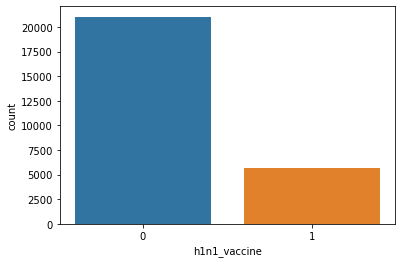

In [6]:
sns.countplot(co['h1n1_vaccine'])
plt.plot()

In [7]:
all=[i for i in co.columns]
all[1:]

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa',
 'no_of_adults',
 'no_of_children',
 'h1n1_vaccine']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-8-25f6affbbac7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(figsize=(8,6))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

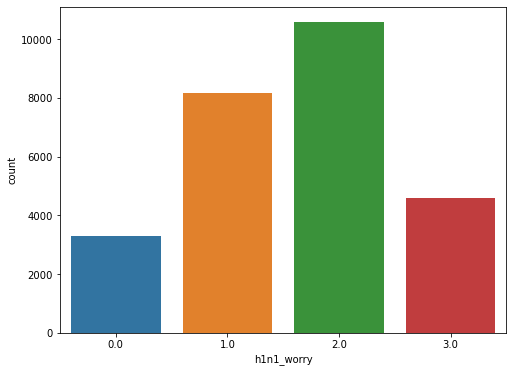

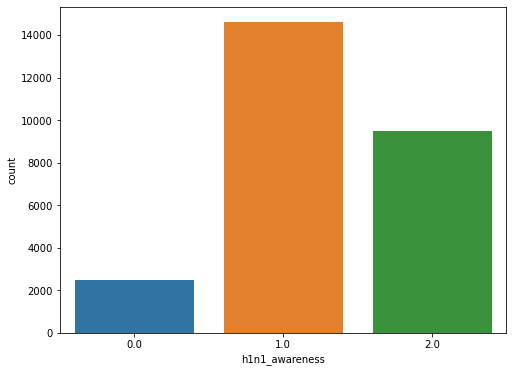

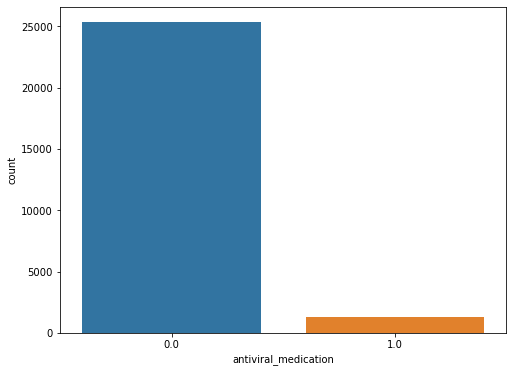

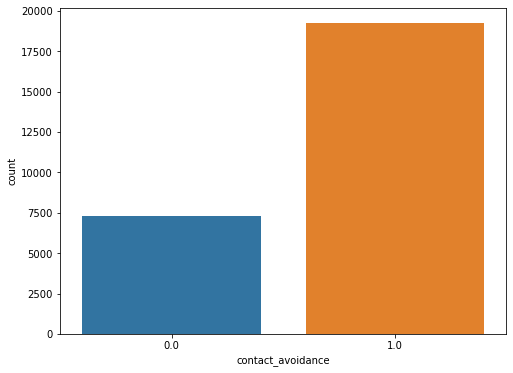

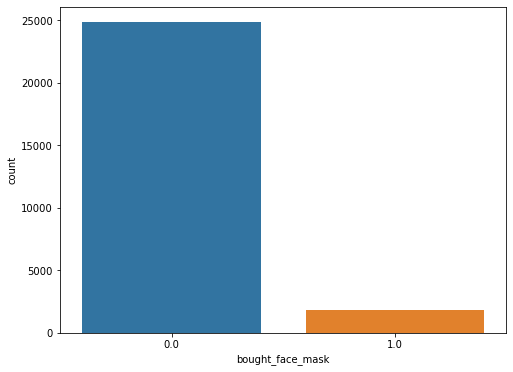

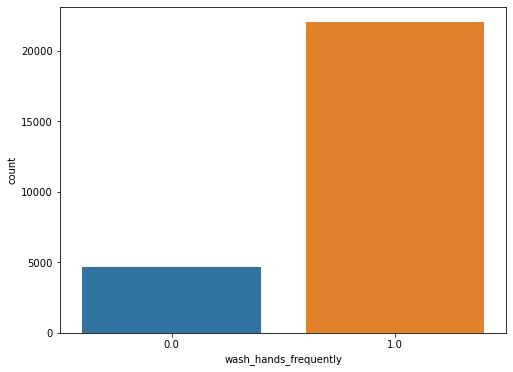

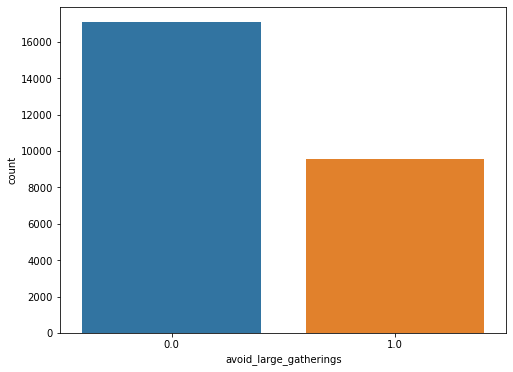

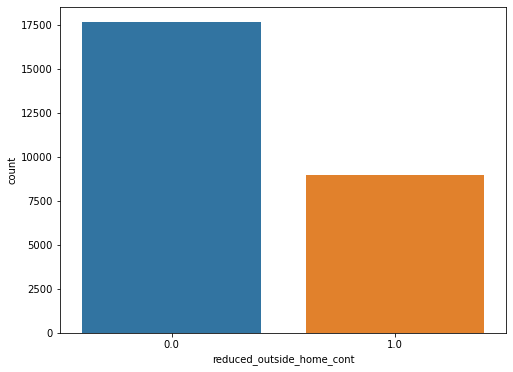

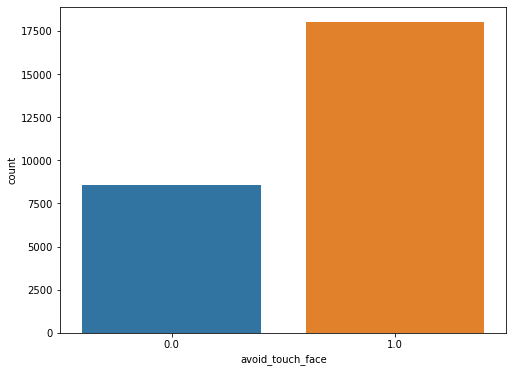

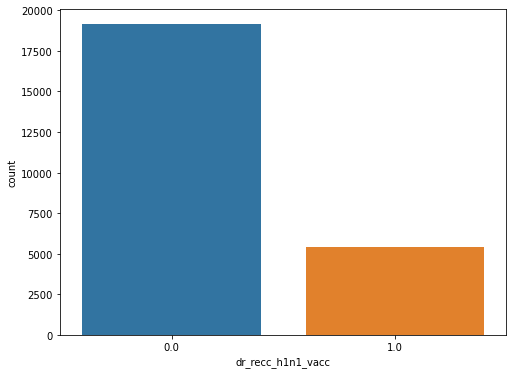

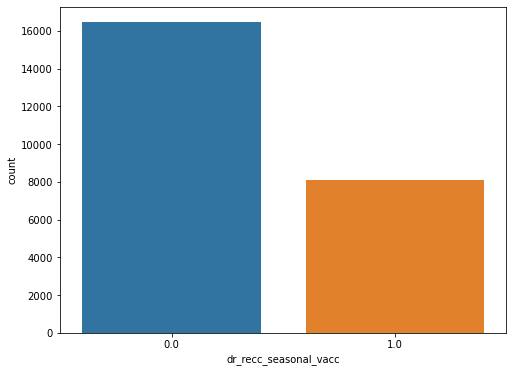

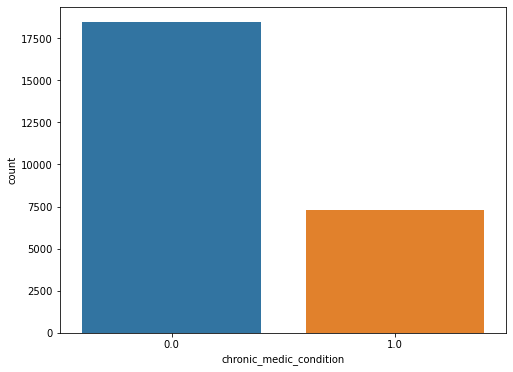

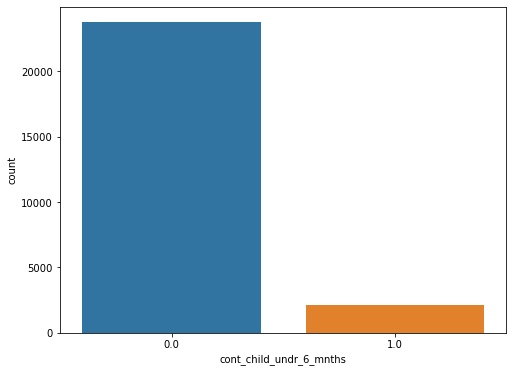

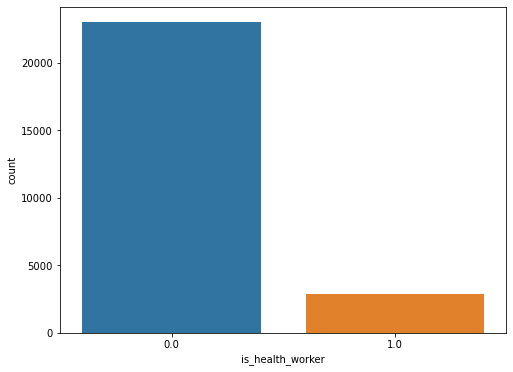

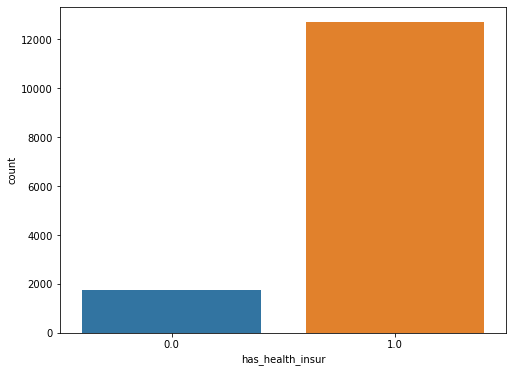

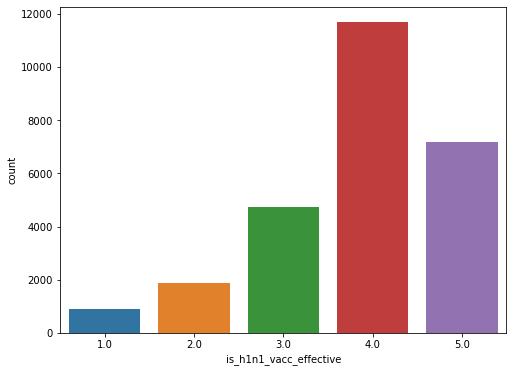

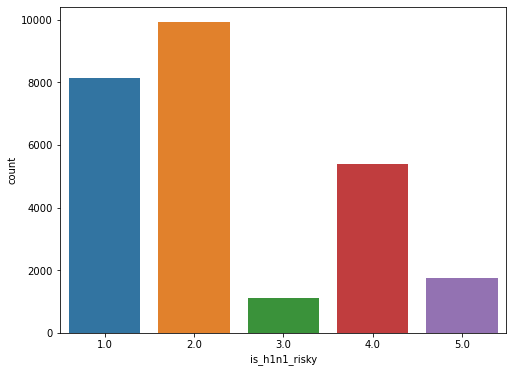

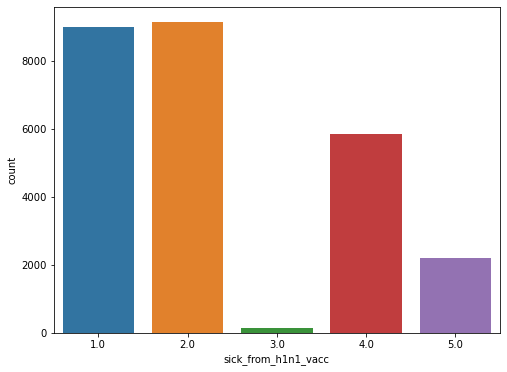

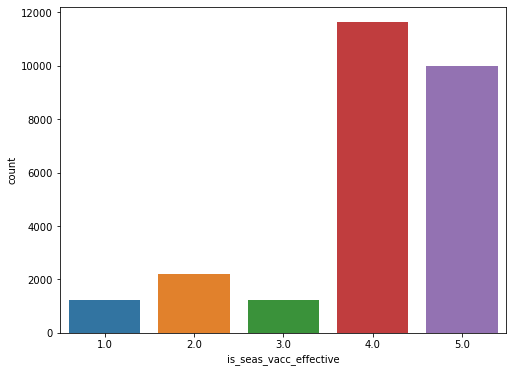

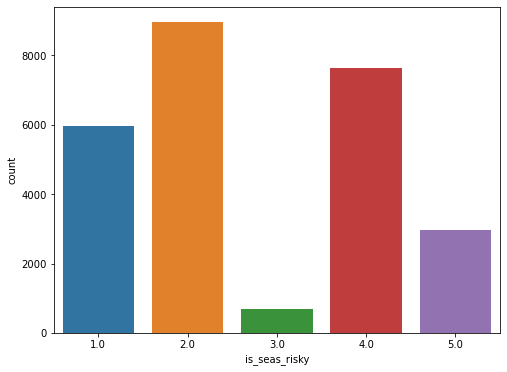

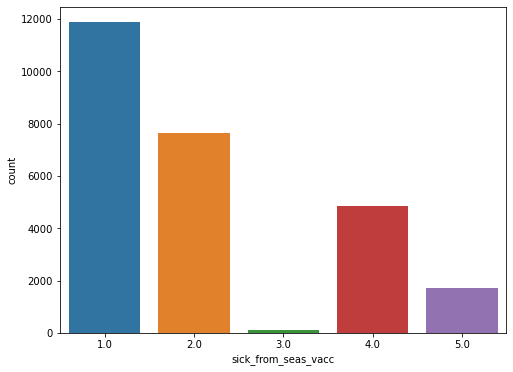

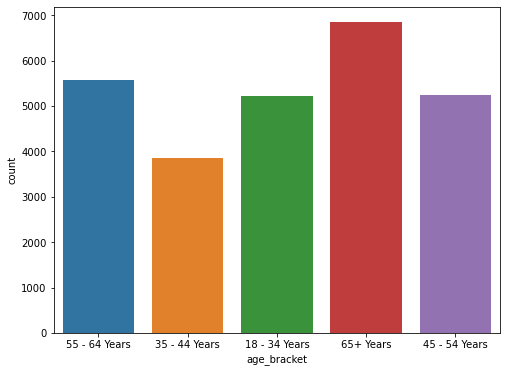

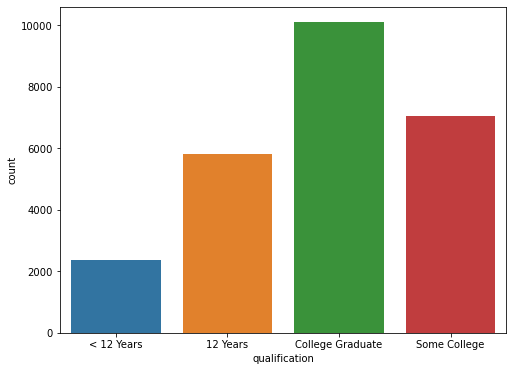

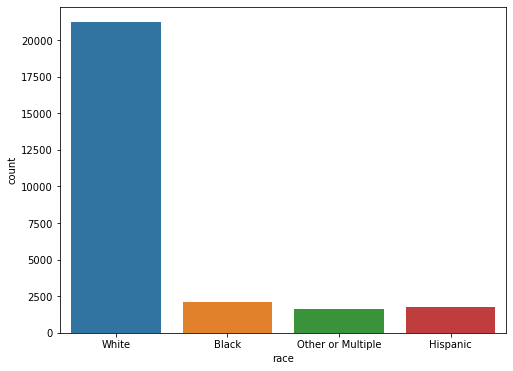

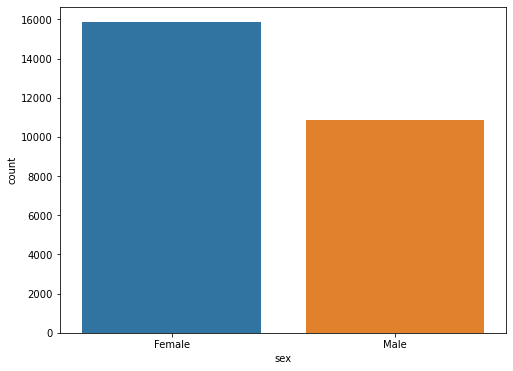

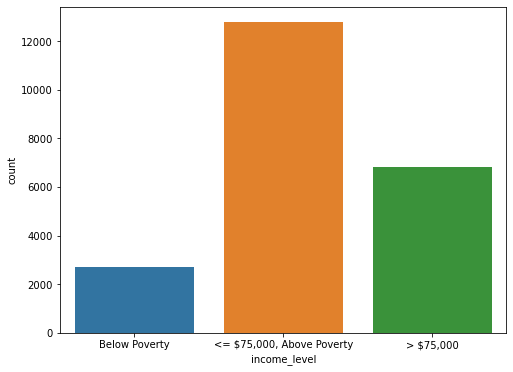

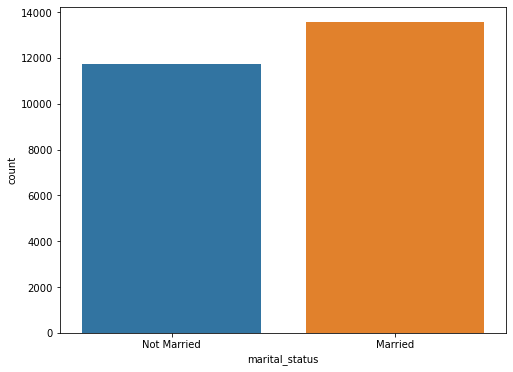

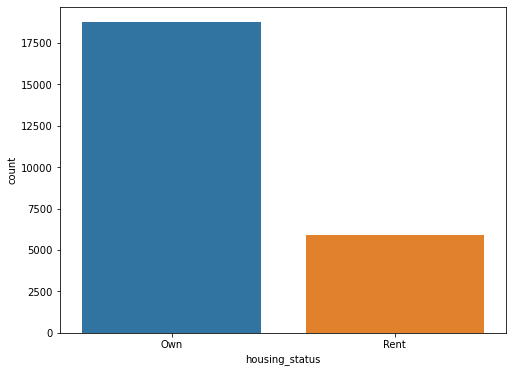

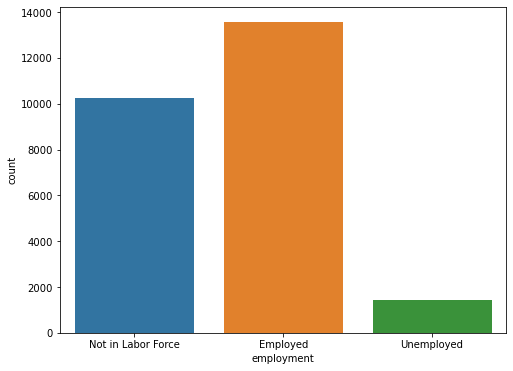

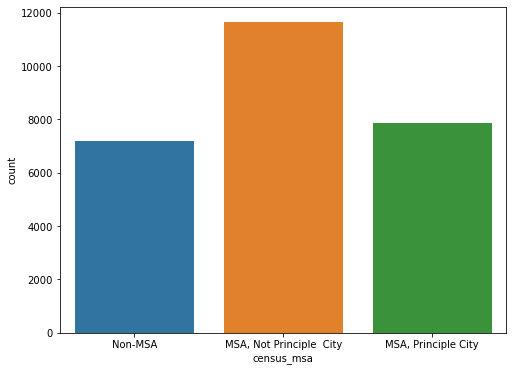

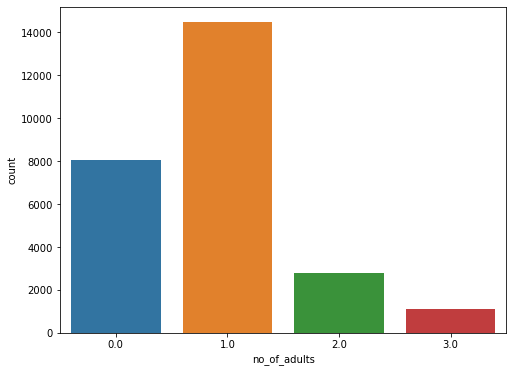

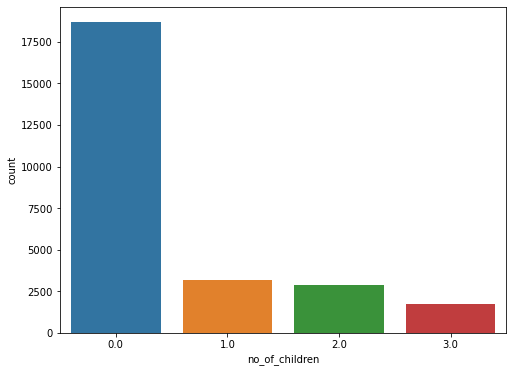

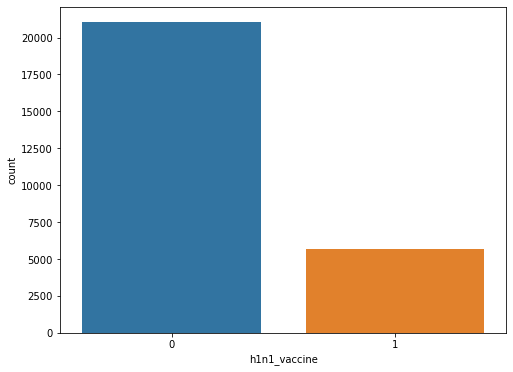

In [8]:
for i in all[1:]:
    plt.subplots(figsize=(8,6))
    sns.countplot(co[i])

In [69]:
co_mat=co.corr()

In [70]:
co_mat['h1n1_vaccine'].sort_values(ascending=False)

h1n1_vaccine                 1.000000
dr_recc_h1n1_vacc            0.394086
is_h1n1_risky                0.320580
is_h1n1_vacc_effective       0.267352
is_seas_risky                0.255874
dr_recc_seasonal_vacc        0.218976
is_seas_vacc_effective       0.177799
is_health_worker             0.168056
h1n1_worry                   0.121574
h1n1_awareness               0.117771
chronic_medic_condition      0.094360
sick_from_h1n1_vacc          0.074580
wash_hands_frequently        0.074570
avoid_touch_face             0.070855
bought_face_mask             0.070413
cont_child_undr_6_mnths      0.066712
contact_avoidance            0.046837
has_health_insur             0.041891
age_bracket                  0.041074
race                         0.041061
antiviral_medication         0.040226
reduced_outside_home_cont    0.022080
qualification                0.020766
avoid_large_gatherings       0.018089
sick_from_seas_vacc          0.009465
no_of_adults                 0.007323
census_msa  

In [71]:
co['dr_recc_h1n1_vacc'].value_counts()

0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [72]:
co['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [73]:
co['dr_recc_seasonal_vacc'].value_counts()

0.0    18613
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder

cat

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [75]:
le= LabelEncoder()

In [76]:
for i in cat:
    print(i)
    print(co[i].value_counts(dropna=False))
    print()

age_bracket
4    6843
3    5563
2    5238
0    5215
1    3848
Name: age_bracket, dtype: int64

qualification
2    10097
4     7043
0     5797
1     2363
3     1407
Name: qualification, dtype: int64

race
3    21222
0     2118
1     1755
2     1612
Name: race, dtype: int64

sex
0    15858
1    10849
Name: sex, dtype: int64

income_level
0    12777
1     6810
3     4423
2     2697
Name: income_level, dtype: int64

marital_status
0    13555
1    11744
2     1408
Name: marital_status, dtype: int64

housing_status
0    18736
1     5929
2     2042
Name: housing_status, dtype: int64

employment
0    13560
1    10231
3     1463
2     1453
Name: employment, dtype: int64

census_msa
0    11645
1     7864
2     7198
Name: census_msa, dtype: int64



In [77]:
co.fillna({'qualification':'College' 'Graduate','income_level':'missing','marital_status':'missing','housing_status':'missing',
            'employment':'missing',},inplace=True)

In [78]:
li_nan=co.columns[co.isna().sum()>0]
len(li_nan)

0

In [79]:
for i in li_nan :
    print(i)
    print(co[i].value_counts(dropna=False))
    print()

In [80]:
co['no_of_children'].mode()

0    0.0
dtype: float64

In [81]:
li_nan

Index([], dtype='object')

In [82]:
for i in li_nan:
    co[i]=co[i].fillna(co[i].value_counts().index[0])
# Check it Worked very well now

In [83]:
co.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [84]:
co['h1n1_worry']=co['h1n1_worry'].fillna(2.0)

In [85]:
co['h1n1_worry'].value_counts().index[0]

2.0

In [86]:
co.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2,4,3,0,0,0,0,0,0,1.0,0.0,0


In [87]:
co1=co.copy()

In [122]:
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [123]:
for i in cat:
    co[i]=le.fit_transform(co[i])

In [124]:
co.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2,4,3,0,0,0,0,0,0,1.0,0.0,0


In [125]:
co['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [127]:
train,test= train_test_split(co,test_size=0.2)

X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [128]:
(X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape)

((21365, 32), (21365,), (5342, 32), (5342,))

In [129]:
log=LogisticRegression()

log.fit(X_train,y_train)

LogisticRegression()

In [130]:
y_train.value_counts()

0    16825
1     4540
Name: h1n1_vaccine, dtype: int64

In [131]:
y_test.value_counts()

0    4208
1    1134
Name: h1n1_vaccine, dtype: int64

In [132]:
pred_h=log.predict(X_test)

In [133]:
confusion_matrix(pred_h,y_test)

array([[3987,  676],
       [ 221,  458]], dtype=int64)

In [134]:
con_mat=confusion_matrix(pred_h,y_test)
# This is by our own method
print("Confusin Matrix")
print(con_mat)

fp=con_mat[1][0]
fn=con_mat[0][1]
tp=con_mat[1][1]
tn=con_mat[0][0]

Acc=(tp+tn)/(fp+fn+tp+tn)
FPR=(fp/(fp+tn))
TPR=(tp/(tp+fn))
Precision=(tp/(tp+fp))
Recall=TPR
f1_score=(2*Precision*Recall/(Precision+Recall))

df_1=pd.DataFrame({'Values in %':[round(Acc*100,2),round(FPR*100,2),round(TPR*100,2),round(Precision*100,2),round(f1_score*100,2)]},
             index=(["Accuracy",'FPR','TPR/Recall','Precision','F1_score']))
df_1

Confusin Matrix
[[3987  676]
 [ 221  458]]


<IPython.core.display.Javascript object>

,Values in %
Accuracy,83.21
FPR,5.25
TPR/Recall,40.39
Precision,67.45
F1_score,50.52


* Here we can Observe that Low FPR it means that Model is predicating Wrongly

In [135]:
y_train.value_counts()

0    16825
1     4540
Name: h1n1_vaccine, dtype: int64

In [136]:
dummy=train[train['h1n1_vaccine']==1]
dummy

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
11313,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,3.0,1.0,4,2,0,1,3,0,0,1,0,1.0,0.0,1
21218,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,4,1,3,0,2,1,0,1,0,0.0,0.0,1
22471,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,1,3,3,1,3,2,2,3,0,1.0,2.0,1
25945,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,2.0,2.0,4,2,0,0,0,1,0,1,1,2.0,0.0,1
278,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,5.0,4.0,4.0,0,2,3,0,0,0,0,0,2,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,5.0,1.0,4.0,2.0,1.0,2,4,3,1,1,0,0,1,2,1.0,2.0,1
24811,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,4.0,4.0,2.0,4.0,4,1,3,1,3,0,0,1,0,1.0,0.0,1
22100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4,4,3,0,3,0,0,1,2,1.0,0.0,1
10668,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,4.0,2.0,5.0,2.0,2.0,0,2,3,0,1,0,0,0,1,1.0,1.0,1


In [137]:
train_2=pd.concat([dummy,train,dummy])

<IPython.core.display.Javascript object>

In [138]:
train_2.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
11313,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,3.0,1.0,4,2,0,1,3,0,0,1,0,1.0,0.0,1
21218,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,4,1,3,0,2,1,0,1,0,0.0,0.0,1
22471,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,1,3,3,1,3,2,2,3,0,1.0,2.0,1
25945,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,2.0,2.0,4,2,0,0,0,1,0,1,1,2.0,0.0,1
278,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,5.0,4.0,4.0,0,2,3,0,0,0,0,0,2,1.0,2.0,1


In [139]:
train_2['h1n1_vaccine'].value_counts()

0    16825
1    13620
Name: h1n1_vaccine, dtype: int64

In [140]:
# Check Training is Done only
X_train=train_2.iloc[:,:-1]
y_train=train_2.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [141]:
log_2=LogisticRegression()

log_2.fit(X_train,y_train)

LogisticRegression()

In [142]:
pred_h_2=log_2.predict(X_test)

In [143]:
con_mat=confusion_matrix(pred_h_2,y_test)
# This is by our own method
print("This is Confusion Matrix")
print()
print(con_mat)

fp=con_mat[1][0]
fn=con_mat[0][1]
tp=con_mat[1][1]
tn=con_mat[0][0]

Acc=(tp+tn)/(fp+fn+tp+tn)
FPR=(fp/(fp+tn))
TPR=(tp/(tp+fn))
Precision=(tp/(tp+fp))
Recall=TPR
f1_score=(2*Precision*Recall/(Precision+Recall))

df_2=pd.DataFrame({'Values in %':[round(Acc*100,2),round(FPR*100,2),round(TPR*100,2),round(Precision*100,2),round(f1_score*100,2)]},
             index=(["Accuracy",'FPR','TPR/Recall','Precision','F1_score']))
df_2

This is Confusion Matrix

[[3458  380]
 [ 750  754]]


<IPython.core.display.Javascript object>

,Values in %
Accuracy,78.85
FPR,17.82
TPR/Recall,66.49
Precision,50.13
F1_score,57.16


In [144]:
pd.concat([df_1,df_2],axis=1) 
# 1. Before Over Sampling 
# 2. After Over Sampling

<IPython.core.display.Javascript object>

,Values in %,Values in %
Accuracy,83.21,78.85
FPR,5.25,17.82
TPR/Recall,40.39,66.49
Precision,67.45,50.13
F1_score,50.52,57.16


## Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
de=DecisionTreeClassifier()

In [146]:
de.fit(X_train,y_train)

DecisionTreeClassifier()

In [147]:
pred_de=de.predict(X_test)

In [148]:
pred_de

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
y_train.value_counts()

0    16825
1    13620
Name: h1n1_vaccine, dtype: int64

In [161]:
con_mat=confusion_matrix(pred_de,y_test)
# This is by our own method
print("Confusion Matrix")
print(con_mat)

fp=con_mat[1][0]
fn=con_mat[0][1]
tp=con_mat[1][1]
tn=con_mat[0][0]

Acc=(tp+tn)/(fp+fn+tp+tn)
FPR=(fp/(fp+tn))
TPR=(tp/(tp+fn))
Precision=(tp/(tp+fp))
Recall=TPR
f1_score=(2*Precision*Recall/(Precision+Recall))

df_decision_2=pd.DataFrame({'Values in %':[round(Acc*100,2),round(FPR*100,2),round(TPR*100,2),round(Precision*100,2),round(f1_score*100,2)]},
             index=(["Accuracy",'FPR','TPR/Recall','Precision','F1_score']))
df_decision_2

Confusion Matrix
[[3578  642]
 [ 630  492]]


<IPython.core.display.Javascript object>

,Values in %
Accuracy,76.19
FPR,14.97
TPR/Recall,43.39
Precision,43.85
F1_score,43.62


##### Original Data

In [151]:
y_train.value_counts()

0    16825
1    13620
Name: h1n1_vaccine, dtype: int64

In [159]:
de_2=DecisionTreeClassifier()

de_2.fit(X_train,y_train)

y_pred_=de_2.predict(X_test)

In [160]:
con_mat=confusion_matrix(y_pred_,y_test)
# This is by our own method
print(con_mat)

fp=con_mat[1][0]
fn=con_mat[0][1]
tp=con_mat[1][1]
tn=con_mat[0][0]

Acc=(tp+tn)/(fp+fn+tp+tn)
FPR=(fp/(fp+tn))
TPR=(tp/(tp+fn))
Precision=(tp/(tp+fp))
Recall=TPR
f1_score=(2*Precision*Recall/(Precision+Recall))

df_decision_1=pd.DataFrame({'Values in %':[round(Acc*100,2),round(FPR*100,2),round(TPR*100,2),round(Precision*100,2),round(f1_score*100,2)]},
             index=(["Accuracy",'FPR','TPR/Recall','Precision','F1_score']))
df_decision_1

[[3572  651]
 [ 636  483]]


<IPython.core.display.Javascript object>

,Values in %
Accuracy,75.91
FPR,15.11
TPR/Recall,42.59
Precision,43.16
F1_score,42.88
